In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Veri setini okuma
file_path = 'data.csv'
df = pd.read_csv(file_path)

In [3]:
# Veri tiplerini kontrol etme
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB
None


In [4]:
# 'Value' sütunundaki geçersiz verileri NaN ile değiştirme
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

In [5]:
# Eksik verileri doldurma (ortalama ile)
df['Value'].fillna(df['Value'].mean(), inplace=True)

In [6]:
# 'YYYYMM' sütununu yıl ve ay olarak ayırma
df['Year'] = df['YYYYMM'].astype(str).str[:4].astype(int)
df['Month'] = df['YYYYMM'].astype(str).str[4:6].astype(int)

In [7]:
# Gereksiz sütunları kaldırma
df = df.drop(columns=['MSN', 'YYYYMM', 'Column_Order', 'Description', 'Unit'])

In [8]:
# Temizlenmiş veri setine bakış
print(df.head())
print(df.info())

    Value  Year  Month
0  72.076  1973      1
1  64.442  1973      2
2  64.084  1973      3
3  60.842  1973      4
4  61.798  1973      5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   5094 non-null   float64
 1   Year    5094 non-null   int32  
 2   Month   5094 non-null   int32  
dtypes: float64(1), int32(2)
memory usage: 79.7 KB
None


C:\Users\win10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


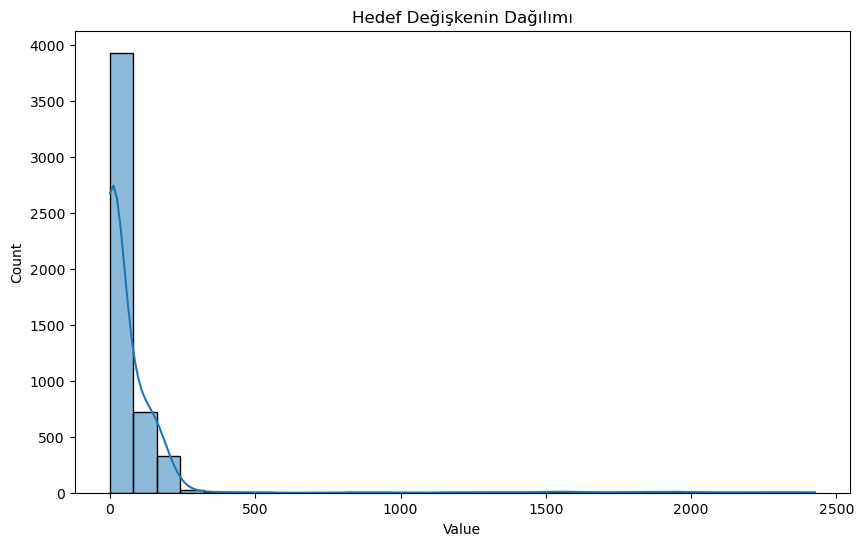

In [9]:
# Hedef değişkenin dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(df['Value'], bins=30, kde=True)
plt.title('Hedef Değişkenin Dağılımı')
plt.show()

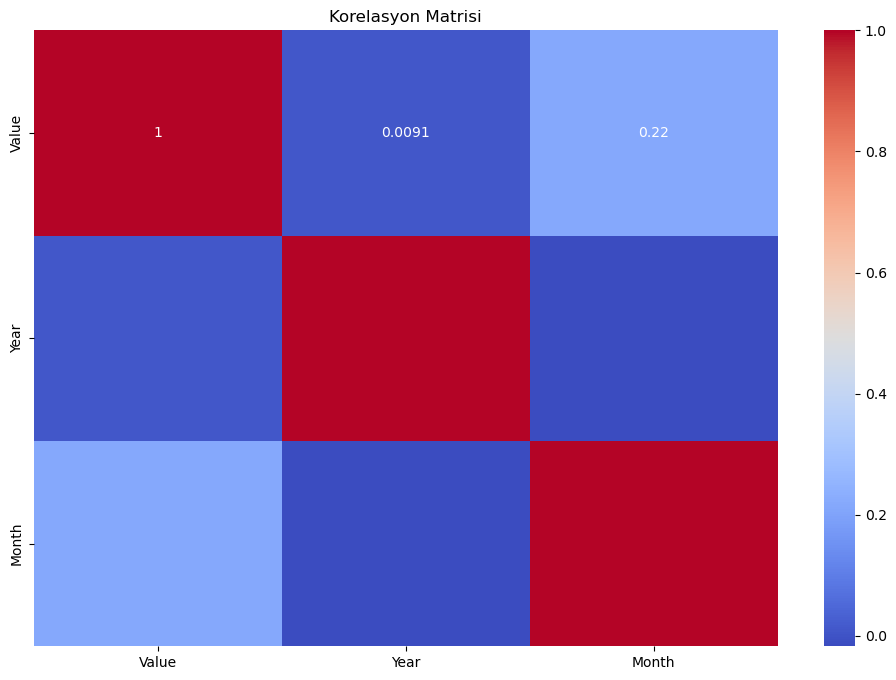

In [10]:
# Özellikler arası korelasyon matrisi
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

In [11]:
# Veriyi bağımlı ve bağımsız değişkenlere ayırma
X = df.drop('Value', axis=1)
y = df['Value']

In [12]:
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Modeli oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Tahminler yapma
y_pred = model.predict(X_test)

In [15]:
# Modeli değerlendirme
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
print("Ortalama Kare Hata (MSE):", mse)
print("R^2 Skoru:", r2)

Ortalama Kare Hata (MSE): 64091.57061975148
R^2 Skoru: 0.05160494843798524
